# Import

In [2]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


# Création du dataframe

In [3]:
def metrique(path):
    files = os.listdir(path);
    contenu = [];
    for file in files:
        if file.endswith('.json'):
            openFile = open(path+file, "r");
            contenu.append(json.loads(openFile.read())["Image"]);
            openFile.close();
    return contenu;

In [4]:
chemin = os.getcwd()+"/train/";
contenu = [];
if not os.path.isdir(chemin):
    print('Rajouter le dossier train dans le dossier courant :) ! ');
else :
    contenu = metrique(chemin);

# Traitement Image pour faire du gradiant

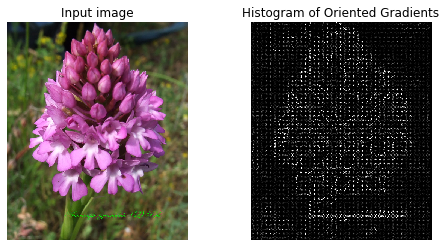

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure

#Récupération de l'image
image = mpimg.imread(os.getcwd()+"/train/281.jpg")

#Transformaation de l'image dans un format utilisable
if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
    image = (image * 255).astype(np.uint8)

#Affichage Image
#plt.imshow(image)
#plt.show()

#Début traitement pour avoir les gradiant
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()




Définition de la fonction donnant l histogramme des gradiants

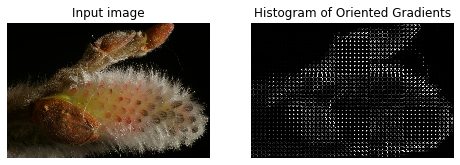

In [6]:

# import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure


def transformeGradiant(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/train/"+nomImage)

    #Transformaation de l'image dans un format utilisable
    if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)

    #Début traitement pour avoir les gradiant
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)


    return hog_image;

def afficherFleurEtGradiant(nomImage,hog_image):
    image = mpimg.imread(os.getcwd()+"/train/"+nomImage)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show();

imgTest=transformeGradiant("23.jpg")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(mpimg.imread(os.getcwd()+"/train/23.jpg"), cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(imgTest, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Traitement dataframe

In [7]:
def creationDicoSpecies():
    chemin = os.getcwd()+"/train/";
    dico={}
    files = os.listdir(chemin);
    for file in files:
        if file.endswith('.json'):
            openFile = open(chemin+file, "r");
            fileSansExt=file.split(".");
            espece=json.loads(openFile.read())["Image"]["Species"];
            openFile.close();
            dico[fileSansExt[0]]=espece;
    return dico;


In [ ]:
#Création d'un dico clé:fichier JSON valeur: Nom espece
dicoSpe=creationDicoSpecies();
#display(dicoSpe);
#Création liste
list=[]
i=0;
for clé in dicoSpe:
    #display(clé+".jpg");
    hog_image=transformeGradiant(clé+".jpg");
    #if i<10:
     #   afficherFleurEtGradiant(clé+".jpg",hog_image);
      #  i=i+1;
    list.append([hog_image,dicoSpe[clé]]);

df = pd.DataFrame(list, columns=['Gradiant','Espèce'])
df.heaf();
df.to_csv('dataFrameGradiant.csv')
#display(df['Gradiant'].get(0))
#afficherFleurEtGradiant("23.jpg",df['Gradiant'].get(1));
